In [13]:
import cptac
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [4]:
cptac.download(dataset="Brca")
br = cptac.Brca()

protein_data = br.get_proteomics()

#The dataframes are MultIndex pandas dataframes. 
#However, to teach the basics of pandas, we will remove the "multi" part of the dataframe.
protein_data = protein_data.droplevel(1, axis=1)

rna_data = br.get_transcriptomics()
clinical_data = br.get_clinical()

In [5]:
protein_data

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,NaN,NaN,-0.3074,-0.3074,-0.0266,...,-0.2528,0.5090,0.0306,0.4908,-0.5570,2.3864,0.3764,-0.6974,1.3541,1.1123
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,NaN,NaN,0.3071,0.7562,-1.6912,...,-3.3351,0.1548,1.0792,-0.6619,-1.4444,-0.3704,0.4909,0.3938,0.2992,-0.3494
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-1.2433,0.9090,-0.2410,0.6717,-0.1651,...,-0.7054,0.2752,0.8850,-2.6704,-0.9444,-1.9717,0.0650,0.6300,-0.0686,0.1798


In [6]:
rna_data

Name,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.2020,0.4851,NaN,-1.0264,5.3754,-1.7357,-2.6428,-1.0939,NaN,0.2623,...,0.2799,0.5755,-0.5886,-0.7428,1.5763,2.3063,-0.9448,0.6603,0.2159,0.1554
CPT001846,1.5602,0.8676,NaN,-1.1659,-2.3353,1.7850,7.8635,1.3619,NaN,-0.0019,...,0.4305,-0.4707,-2.0699,-2.0325,-0.0221,NaN,0.0745,1.9567,-0.4364,-0.1601
X01BR001,-0.4547,1.7415,NaN,-0.3769,2.1803,1.3121,NaN,0.8310,NaN,-0.3131,...,-0.2010,-1.6472,0.3005,0.3112,0.3747,1.0260,0.2738,-0.0211,0.3720,-0.6570
X01BR008,-1.4653,0.4251,NaN,-0.5979,5.8009,0.5635,-2.6931,-1.0861,NaN,0.0043,...,0.3331,1.3433,-1.8711,-1.3578,0.0305,1.3676,-1.6430,0.3679,0.6431,-0.1793
X01BR009,1.0341,2.0925,NaN,0.6195,7.0649,-0.7143,NaN,0.2492,-2.2484,0.4772,...,-0.0054,-1.0478,-1.3751,-1.8079,-0.1200,-4.6279,-0.8619,-0.0338,1.5769,-0.6337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.0196,0.2171,NaN,-0.3940,-2.0997,1.0183,6.4045,-0.2501,-1.7260,0.6178,...,-0.7115,0.1819,-1.2171,-1.3631,1.3455,NaN,-0.7515,0.3044,1.3806,-1.1197
X21BR002,NaN,NaN,NaN,2.1073,-4.0915,NaN,NaN,3.8259,NaN,0.6250,...,-0.7193,-0.3678,-1.8014,-1.4538,1.5637,NaN,-0.5786,0.8320,1.0435,-1.1151
X21BR010,-3.2675,-1.0806,NaN,0.4900,NaN,-0.1154,NaN,-5.5735,NaN,-1.2094,...,-0.6299,-3.1189,0.7028,0.7773,-0.1069,-4.5936,0.9043,-1.5439,-1.4296,0.9932


In [24]:
clinical_data["Age_in_years"] = clinical_data["Age.in.Month"] #fill in with correct math
clinical_data

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,Age.in.Month,Gender,Race,Human.Readable.Label,Experiment,Channel,Stage,PAM50,...,PR.IHC.Score,Coring.or.Excision,Ischemia.Time.in.Minutes,Ischemia.Decade,Necrosis,Tumor.Cellularity,Total.Cellularity,In.CR,QC.status,Age_in_years
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,NaN,NaN,black.or.african.american,CPT000814 0004,13,127C,Stage IIA,Basal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass,NaN
CPT001846,CPT001846,Tumor,NaN,NaN,white,CPT001846 0005,12,128C,Stage III,Basal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC.pass,NaN
X01BR001,X01BR001,Tumor,660.0,female,black.or.african.american,[17]-af938b_D2,2,129N,Stage IIB,Basal,...,0,coring,0.0,1.0,10.0,70.0,50.0,yes,QC.pass,55.0
X01BR008,X01BR008,Tumor,NaN,NaN,NaN,[cf]-467c39_D1,16,127C,NaN,Basal,...,NaN,NaN,NaN,NaN,0.0,90.0,60.0,no,QC.pass,NaN
X01BR009,X01BR009,Tumor,NaN,NaN,NaN,[0e]-051582_D1,16,127N,NaN,Basal,...,NaN,NaN,NaN,NaN,0.0,80.0,70.0,no,QC.pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,NaN,NaN,white,[1f]-d9108c,16,128N,NaN,LumB,...,NaN,NaN,NaN,NaN,0.0,60.0,80.0,no,QC.pass,NaN
X21BR002,X21BR002,Tumor,NaN,NaN,white,[32]-22665e,16,128C,NaN,LumA,...,NaN,NaN,NaN,NaN,0.0,65.0,60.0,no,QC.pass,NaN
X21BR010,X21BR010|X21BR010.REP1,Tumor,852.0,female,white,[68]-4d3e43_D2,3|17,129C|128C,Stage IIA,LumA,...,3+,excision,18.0,2.0,0.0,60.0,55.0,yes,QC.pass,71.0


## A note about saving pandas
What if you do not want to continue loading in data every time? You can save the file as a csv (comma separated version). A csv is a very common file type to save data. You can also open a csv in excel if desired. 

In [ ]:
clinical_data.to_csv("PATH/FILENAME.csv")

#Repeat with protein_data and rna_data if desired
#We would recommend creating a "data" folder where you can keep all these files organized

In [ ]:
#Read back in your data
#Try with different arguments. The index_col=0 creates the index (rownames) as the first column. 
#Double check that the index and columns are what you want
clinical_data_readin = pd.read_csv("PATH/FILENAME.csv", index_col=0)

## Spearman Tutorial
Remember, the spearman correlation tests the association between two variables. The spearman rho is a number from -1 to 1. -1 describes a negative relationship (as one variable increases the other descreases or vice versa) and +1 describes a positive relationship (as one variable increases the other also increases or vice versa)

### First we are going to look at individual genes
You may be interested in the correlation between the genomics and transcriptomics of one particular gene. For the example, we will look at the ESR1 gene.

In [9]:
#Step 1: Check that the patients are in the same order.
#This is important because we are looking at the gene expression and protein information of EACH patient
#The data needs to be in pairs. This is easiest when the patients are in the same order in rna_data and protein_data

#Are the index or columns (rna_data.index or rna_data.columns) the patients?

#Write an assert statement that checks the patients rna_data are equal to the patients of protein_data 
#Fill in parantheses 
assert list() == list()



In [16]:
#Step 2: Access the transcriptomic and proteomic information of the specific gene (ESR1)

#Fill in the brackets []. We want ALL rows of the ESR1 column. 
#Remember [row,col] format and : refers to ALL.
rna_esr1 = rna_data.loc[]
protein_esr1 = protein_data.loc[]

rho, spear_pvalue = stats.spearmanr( rna_esr1, protein_esr1 )

#The order of transcriptomics and proteomics doesn't matter. Why?
rho_check, spear_pvalue_check = stats.spearmanr( protein_esr1, rna_esr1 )

assert rho == rho_check

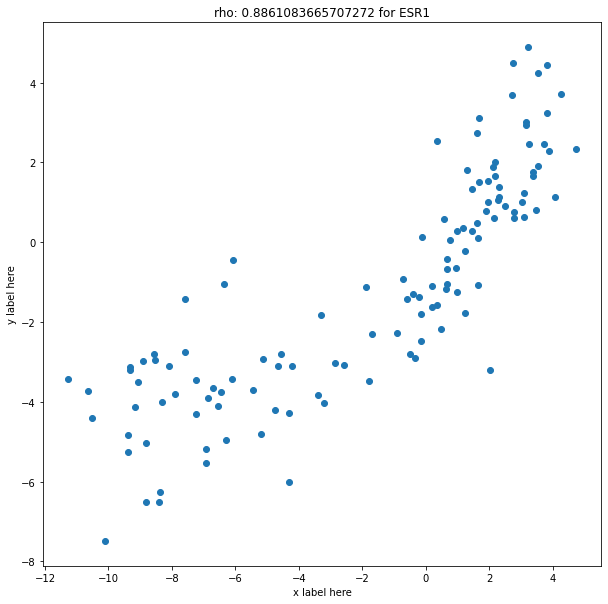

In [23]:
#Step 3: Plot the data
#You can present the rho value in various ways. Table, scatterplot, etc. 
#Here you will make a scatterplot

plt.figure( figsize=(10,10) )

#Replace x and y with appropriate variables
plt.scatter( x, y )

title = "rho: {} for ESR1".format(rho) #This is string formatting. The variable in the () will print in the {}
plt.title(title)

#Fill in informative x and y labels
plt.xlabel("x label here")
plt.ylabel("y label here")

plt.show() #Comment out when running in script
#plt.savefig( "PATH/FILENAME.png", bbox_inches="tight" ) #Use this when saving figure in script

Check your understanding: What does the rho represent here?



### Repeat with only young and only old patients for practice

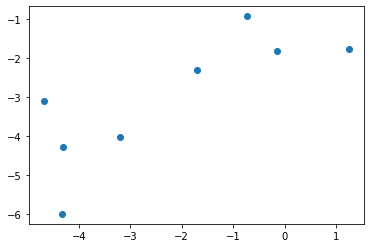

In [32]:
#Access only young and only old patients via a boolean mask 

#What column of clinical_data is referring to age?
young_mask = clinical_data["fill in here"] < 40.0
old_mask = clinical_data["fill in here"] >= 60.0

#Check for understanding: Why do the below lines work?
rna_esr1_young = rna_data["ESR1"][ young_mask ]
protein_esr1_young = protein_data["ESR1"][ young_mask ]

#We want all patients of the ESR1 column
rna_esr1_old = #fill in here
protein_esr1_old = #fill in here

#Create the two scatter plots!

# Spearman Heatmaps
What if we are interested in the overall correlations across multiple genes? Heatmaps are commonly used to show multiple spearman values. These heatmaps show a LOT of information so make sure you understand what the heatmap is showing. 

### Heatmap: Transcriptomics vs. Proteomics

Step 1: Visualize your heatmap 

For this first heatmap, we want transcriptomics on one axis and proteomics on the other.

Check your understanding: Describe each cell in the heatmap. What are the dimensions of the heatmap?

In [107]:
#Step 2: Find the genes that are in the both protein_data and rna_data

#There are NA's in the protein_data and rna_data
#We will just drop any genes (columns) that have NA's
protein_data.dropna( inplace=True, axis=1 )
rna_data.dropna( inplace=True, axis=1 )

#Notice that the there are repeated genes in the protein data
#Does this make sense?
print( protein_data.shape[1] ) #number of columns (genes)
print( len(np.unique(protein_data.columns)) ) #number of UNIQUE columns (genes)

unique_genes = np.intersect1d( rna_data."index or columns?", protein_data."index or columns?" )

#Fill in the []. Use : and unique_genes.
protein_data_genes = protein_data.loc[]

#Check your undertanding of the following lines!
genes_with_repeats = list( protein_data_genes.columns )
rna_data_genes = rna_data.loc[:, genes_with_repeats]

#Check for understanding: What do the assert statements check?
assert list(rna_data_genes.index) == list(protein_data_genes.index)
assert list(rna_data_genes.columns) == list(protein_data_genes.columns)

7767
7586


In [120]:
#Step 3: Calculate the Spearman correlations

#We need to calculate a spearman rho for each pair of genes (transcriptomics and proteomics)
#this calls for nested for loops!

#What are the dimensions of your final graph?
genes_with_repeats_subset = genes_with_repeats[1:21]
n = #fill in with the dimension of one axis. The graph is square.
final_graph = np.zeros( (n,n) )

for i, geneA in enumerate( genes_with_repeats_subset ):

    #we will fill in row by row
    graph_row = []
    for j, geneB in enumerate( genes_with_repeats_subset ):
        
        rho, spear_pvalue = stats.spearmanr( rna_data_genes.iloc[:,i], protein_data_genes.iloc[:,j])
        
        #append rho to graph_row here

    
    #set row i of final_graph equal to graph_row
    #remember [row, col] format, with : referring to all rows or all cols


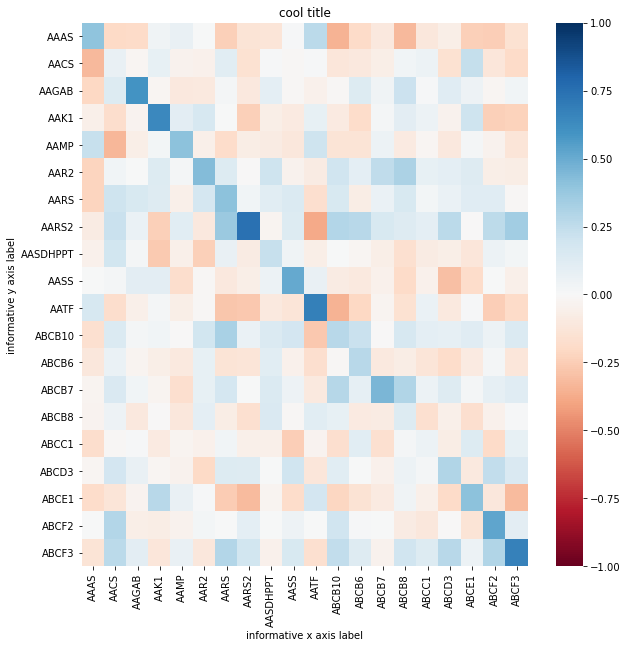

In [133]:
#Step 4: Create the Heatmap

plt.figure(figsize=(10,10))
ax_spear = sns.heatmap(final_graph, cmap='RdBu', xticklabels=genes_with_repeats_subset, \
                                                yticklabels=genes_with_repeats_subset, center=0, vmin=-1, vmax=1)
ax_spear.set_title("cool title")
ax_spear.set_ylabel("informative y axis label")
ax_spear.set_xlabel("informative x axis label")

plt.show() #Use in Jupyter, Comment out if running full script
#plt.savefig("PATH/FILE.png", bbox_inches="tight") #Use to save figure if running full script

## Distribution of Spearman 
The heatmap compares every gene to every other gene. However, we might be interested in just the comparison the transcriptomics and proteomics of each gene rather than every pair of genes

In [122]:
#We already set up the rna_data and protein_data
assert list(rna_data_genes.index) == list(protein_data_genes.index)
assert list(rna_data_genes.columns) == list(protein_data_genes.columns)

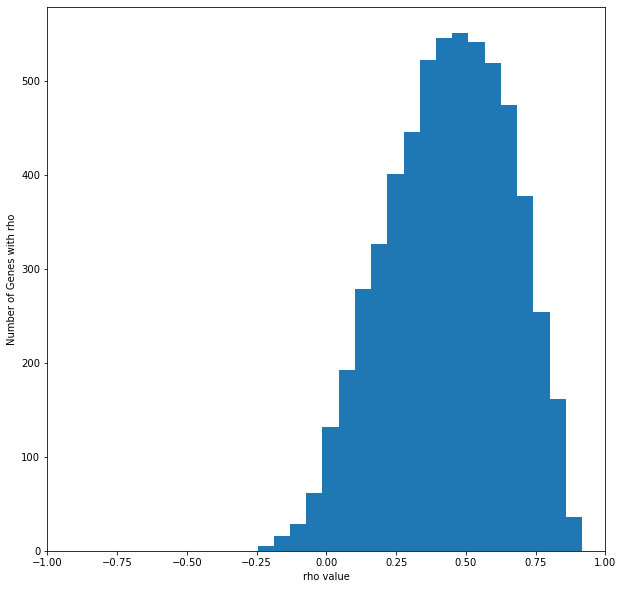

In [132]:
#We only need ONE for loop this time... Why?

rho_list = []
for ii,gene in enumerate( list( "fill in here" ) ):
    
    rho, spear_pvalue = stats.spearmanr( rna_data_genes.iloc[:,ii], protein_data_genes.iloc[:,ii])
    #append rho to rho_list
    

plt.figure(figsize=(10,10))
plt.hist( rho_list, bins=20 )
plt.xlim(-1,1)
plt.xlabel("rho value")
plt.ylabel("Number of Genes with rho")

plt.show() #Use in Jupyter, Comment out if running full script
#plt.savefig("PATH/FILE.png", bbox_inches="tight") #Use to save figure if running full script